# Example section companion notebook

This notebook demonstrates the results of subsection 5.1.2 of [1]. Here, we will compute the $\hat{Z}$ invariant of the Seifert manifold $M(-2;\frac{1}{2},\frac{2}{3},\frac{2}{3})$, we will calculate the associated Weil representation and we will verify that through Wilson line insertion we can complete the representation. 

## Defect $\hat{Z}$ invariants

Here we compute the $\hat{Z}$ invariants with and without defects of the manifold. We do so using pyPlumbing. To that end, we import the Plumbing class and define a Plumbing as a Seifert manifold.

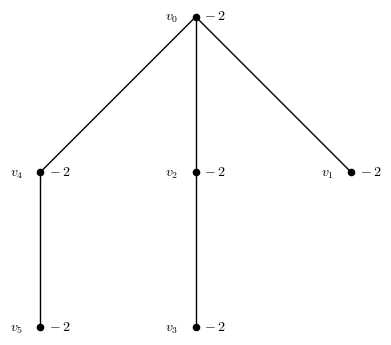

In [1]:
from pyPlumbing import Plumbing
P = Plumbing.from_Seifert_data([-2,1/2,2/3,2/3])
P.display()

PyPlumbing provides functionality to compute the $\hat{Z}$ invariant. With trivial boundary conditions and Wilson line insersions in the heighest weight representations (0), (1) on the node $v_5$ we obtain:

In [2]:

group_rank = ["A",1]
b0,b1 = P.spin_c(group_rank)
print("b = %s" % b0.T)
for w in range(2):
    W = [vector([0])]*5 + [vector([w])]
    print("  w = %s" % W)
    zh = P.zhat(group_rank, b0, 20, wilson=W)
    print("  zh = %s" % zh)
    
print("b = %s" % b1.T)
for w in range(2):
    W = [vector([0])]*5 + [vector([w])]
    print("  w = %s" % W)
    zh = P.zhat(group_rank, b1, 20, wilson=W)
    print("  zh = %s" % zh)
    

b = [ 1 -1  0 -1  0 -1]
  w = [(0), (0), (0), (0), (0), (0)]
  zh = q^(-1)(4 - 4q^(1) + 4q^(2) + 4q^(5) - 4q^(7) - 4q^(12) + 4q^(15) + 4q^(22) - 4q^(26) - 4q^(35) + O(q^40))
  w = [(0), (0), (0), (0), (0), (1)]
  zh = q^(5667/2000)(4 - 4q^(6) + 4q^(15) - 4q^(27) + O(q^28))
b = [ 3 -1 -2 -1  0 -3]
  w = [(0), (0), (0), (0), (0), (0)]
  zh = q^(-1333/2000)(-4 + 4q^(3) - 4q^(9) + 4q^(18) + O(q^19))
  w = [(0), (0), (0), (0), (0), (1)]
  zh = q^(5667/2000)(4 - 4q^(6) + 4q^(15) - 4q^(27) + O(q^28))


## Weil Representation

We wish to compare the $\hat{Z}$ $q$-power expansions with the $q$-series expansions of the linear combinations of false theta functions associated to the Weil representation. To that end we import the functions of weyl_rep_fncs.sage which provide the necessary functionality.

In [3]:
m = 2*3
K = [1,3]

In [4]:
import numpy as np
load("weil_rep_fncs.sage")
proj = weil_projector(m,K)
ind = [np.arange(2*m)[p != 0] for p in proj if len(np.arange(2*m)[p != 0]>0)]
signs = [np.sign((p)[ p != 0]) for p in proj if len(np.arange(2*m)[p != 0]>0)]
reps = list()
rep_sgns = list()
for rep,sgn in zip(ind,signs):
    if not list(rep) in reps:
        reps += [list(rep)]
        rep_sgns += [list(sgn)]
th = function('theta', nargs=2)
for rep,rep_sgn in zip(reps,rep_sgns):
    print("index = %s" % rep[0])
    print("theta_{"+str(rep[0])+"}^{m+K} = %s" % sum(int(s)*th(m,r) for r,s in zip(rep,rep_sgn)))
    theta_expansion = 0
    for r,s in zip(rep,rep_sgn):
        theta_expansion += s*false_theta(m,int(r),20)
    print("theta_{"+str(rep[0])+"}^{m+K} = %s" % format_expansion(theta_expansion))

index = 1
theta_{1}^{m+K} = -theta(6, 11) - theta(6, 7) + theta(6, 5) + theta(6, 1)
theta_{1}^{m+K} = 2*q^(1/24)*(1.0 + 1*q + (-1.0)*q^2 + (-1.0)*q^5 + 1*q^7 + 1*q^12 + (-1.0)*q^15 + Order(q^20))
index = 3
theta_{3}^{m+K} = -theta(6, 9) + theta(6, 3)
theta_{3}^{m+K} = 2*q^(3/8)*(1.0 + (-1.0)*q^3 + 1*q^9 + (-1.0)*q^18 + Order(q^20))


## Bibliography
[1] Cheng Et al, 3D Modularity Revisited, ArXiv 2403.14920